In [3]:
# custom function from Web_scrapper_League_Tables notebook 
from ipynb.fs.full.Web_scrapper_League_Tables import League_table_scraper

In [87]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import matplotlib.colors as colors


### Scrape squad details from wikipedia

In [19]:
df1 = League_table_scraper('https://en.wikipedia.org/wiki/CR_Vasco_da_Gama',3)
df2 = League_table_scraper('https://en.wikipedia.org/wiki/CR_Vasco_da_Gama',4)

In [20]:
df2.head()

,No.,club,Nation,Player
0,24,GK,BRA,Hedhe Halls
1,25,MF,BRA,Marlon Gomes
2,35,DF,BRA,Miranda
3,36,DF,BRA,Lucas Piton
4,38,MF,BRA,Laranjeira


In [155]:
df_vasco = pd.concat([df1,df2],axis=0).drop_duplicates()

### Clean data frame

In [41]:
df_vasco.head(31)

,No.,Position,Nation,Player
0,1,GK,BRA,Thiago Rodrigues
1,2,DF,URU,Puma Rodríguez
2,3,DF,BRA,Léo Pelé
3,4,DF,BRA,Anderson Conceição (captain)
4,5,MF,BRA,Patrick de Lucca
5,6,DF,BRA,Edimar
6,9,FW,BRA,Pedro Raul
7,10,MF,BRA,Nenê
8,11,FW,BRA,Gabriel Pec
9,13,DF,BRA,Gabriel Dias


In [156]:
df_vasco.rename(columns={"club": "Position"}, inplace=True)

In [157]:
df_vasco['No.'] = df_vasco['No.'].astype('string')

### Add additional variables needed for prediction

In [42]:
list(df_vasco['No.'])

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '9',
 '10',
 '11',
 '13',
 '15',
 '18',
 '19',
 '21',
 '22',
 '23',
 '24',
 '25',
 '35',
 '36',
 '38',
 '40',
 '44',
 '45',
 '49',
 '50',
 '66',
 '77',
 '98',
 '–',
 '–']

In [158]:
# Mannually added using transferMarket
# https://www.transfermarkt.co.uk/club-de-regatas-vasco-da-gama/kader/verein/978/saison_id/2022
AGE_DICT = {'1': 34,
 '2':25,
 '3':26,
 '4':33,
 '5':22,
 '6':36,
 '9':26,
 '10':41,
 '11':21,
 '13':28,
 '15':21,
 '18':28,
 '19':22,
 '21':18,
 '22':23,
 '23':23,
 '24':23,
 '25':19,
 '35':22,
 '36':22,
 '38':22,
 '40':23,
 '45':20,
 '49':21,
 '50':21,
 '66':21,
 '77':26,
 '98':24,
}

In [124]:
POSITION_DICT = {
    'DF':'Defender',
    'GK':'Keeper',
    'MF':'Midfielder',
    'FW':'Forward'
}

In [159]:
df_vasco['Position'] = df_vasco['Position'].map(POSITION_DICT)

In [160]:
df_vasco['Age'] = df_vasco['No.'].map(AGE_DICT)

In [161]:
df_vasco.loc[df_vasco['Player']=='Robson Bambu (on loan from Nice)', 'Age'] = 25
df_vasco.loc[df_vasco['Player']=='Matías Galarza', 'Age'] = 20

In [162]:
df_vasco.head()

,No.,Position,Nation,Player,Age
0,1,Keeper,BRA,Thiago Rodrigues,34.0
1,2,Defender,URU,Puma Rodríguez,25.0
2,3,Defender,BRA,Léo Pelé,26.0
3,4,Defender,BRA,Anderson Conceição (captain),33.0
4,5,Midfielder,BRA,Patrick de Lucca,22.0


In [163]:
df_vasco = df_vasco.assign(Age_group=pd.cut(df_vasco['Age'], 
                               bins=[0, 17, 21,23, 27, 32,99], 
                               labels=['U18', '18-21', '21-23','23-27','27-32','32+']))


### Basic EDA plots

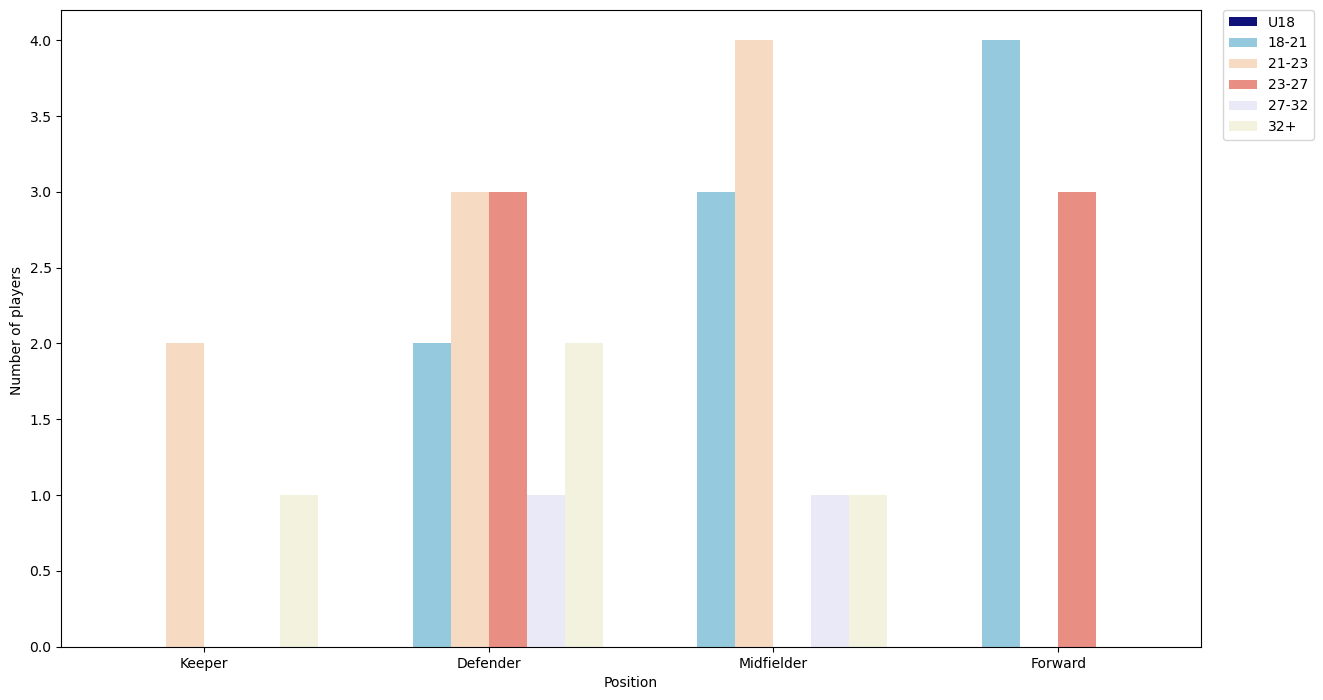

In [164]:
plt.figure(figsize=(14.7, 8.27))

# Define the custom color palette
custom_palette = sns.color_palette(['darkblue', '#87CEEB', '#FFDAB9', '#FA8072','#E6E6FA','#F5F5DC'])

plot1 = sns.countplot(x = "Position",hue = 'Age_group', data = df_vasco, palette=custom_palette)

plot1.set_xlabel('Position')
plot1.set_ylabel('Number of players ')

# Place the legend outside the top right corner of the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Rotate the x-axis labels by 0 degrees
labels = plot1.get_xticklabels()
plot1.set_xticklabels(labels, rotation=0)

plt.savefig('Vasco_position.png', transparent=True)

plt.show()

In [85]:
df_vasco[df_vasco['Position']=='FW']

,No.,Position,Nation,Player,Age,Age_group
6,9,FW,BRA,Pedro Raul,26.0,23-27
8,11,FW,BRA,Gabriel Pec,21.0,18-21
10,15,FW,BRA,Figueiredo,21.0,18-21
13,21,FW,BRA,Eguinaldo,18.0,18-21
8,49,FW,BRA,Vinícius Paiva,21.0,18-21
11,77,FW,BRA,Erick (on loan from Ypiranga),26.0,23-27
12,98,FW,BRA,Zé Santos,24.0,23-27


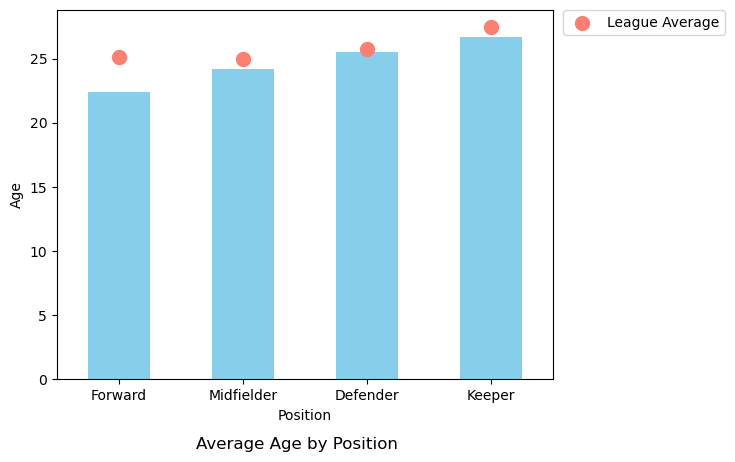

In [165]:
#plt.figure(figsize=(1, 6))

grouped = df_vasco.groupby('Position')['Age'].mean()
grouped = grouped.reindex(['Forward', 'Midfielder','Defender','Keeper'])

# Plot the average age by position
plot = grouped.plot.bar(color = 'skyblue')

league_average = [25.145299145299145, 24.979591836734695, 25.75207756232687, 27.431818181818183]

plt.scatter(x=grouped.index, y=league_average, s=100, color='#FA8072',label='League Average')
    
# Add a title and labels to the plot
plt.suptitle("Average Age by Position",y = -0.01)
plt.xlabel("Position")
plt.ylabel("Age")

# Rotate the x-axis labels by 0 degrees
labels = plot.get_xticklabels()
plot.set_xticklabels(labels, rotation=0)

# Place the legend outside the top right corner of the plot
plt.legend(labels=['League Average'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig('Vasco_age.png', transparent=True)

# Show the plot
plt.show()


In [138]:
grouped

Position
Forward       22.428571
Midfielder    24.222222
Defender      23.333333
Keeper        26.666667
Name: Age, dtype: float64

In [146]:
df_vasco[df_vasco['Position']=='Defender']

,Position,No.,Nation,Player,Age
3,Defender,2,URU,Puma Rodríguez,25.0
4,Defender,3,BRA,Léo Pelé,26.0
5,Defender,4,BRA,Anderson Conceição (captain),33.0
6,Defender,6,BRA,Edimar,36.0
7,Defender,13,BRA,Gabriel Dias,28.0
8,Defender,35,BRA,Miranda,22.0
9,Defender,36,BRA,Lucas Piton,22.0
10,Defender,40,BRA,Ulisses,23.0
11,Defender,44,BRA,Zé Vitor,-1.0
12,Defender,45,BRA,Riquelme,20.0
